In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import log_loss

In [17]:
train_df = pd.read_csv('../data/TCGA-SKCM_train_unresampled.csv',index_col=0)
train_df.head()

,sample_type,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,...,TICAM2.2,TICAM2.3,SLC25A5-AS1,gender_male,ethnicity_not hispanic or latino,ethnicity_not reported,treatments_pharmaceutical_treatment_or_therapy_not reported,treatments_pharmaceutical_treatment_or_therapy_yes,treatments_radiation_treatment_or_therapy_not reported,treatments_radiation_treatment_or_therapy_yes
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-EB-A41B,0,23.555556,76.0,801.3332,6238.8730,27.0198,0.0000,13.1544,0.0000,4371.1670,...,30.9270,87.9140,34.4858,0,1,0,0,0,0,0
TCGA-BF-A1PX,0,25.469388,56.0,285.0608,32098.0014,42.7529,0.3476,7407.3688,5.9089,3306.2218,...,122.0021,0.0000,14.2510,1,1,0,0,0,0,0
TCGA-EE-A3JI,1,32.782274,48.0,229.8379,4089.7681,17.4564,0.0000,18.4539,0.4988,2979.8005,...,20.9526,118.6209,17.2070,1,1,0,0,1,0,1
TCGA-EB-A431,0,21.453287,34.0,156.7812,31343.0448,86.9943,0.0000,110.4828,0.0000,2107.0030,...,0.0000,96.9856,56.9813,1,1,0,0,0,0,0
TCGA-FS-A1ZA,1,29.832059,45.0,187.8586,66065.9201,20.9874,0.0000,28392.1144,2.9982,2052.2722,...,171.9381,145.8777,24.5853,0,1,0,0,0,0,0


In [18]:
test_df = pd.read_csv('../data/TCGA-SKCM_test_unresampled.csv',index_col=0)
test_df.head()

,sample_type,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,...,TICAM2.2,TICAM2.3,SLC25A5-AS1,gender_male,ethnicity_not hispanic or latino,ethnicity_not reported,treatments_pharmaceutical_treatment_or_therapy_not reported,treatments_pharmaceutical_treatment_or_therapy_yes,treatments_radiation_treatment_or_therapy_not reported,treatments_radiation_treatment_or_therapy_yes
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-EE-A29E,1,30.304530,54.0,164.5636,5010.2596,87.5642,0.0,1751.8540,0.0000,2243.0120,...,15.6446,109.6606,31.3748,1,1,0,0,0,0,0
TCGA-GN-A4U5,0,34.078462,61.0,159.8184,24278.3904,112.6702,0.0,11617.4164,4.1271,3583.1614,...,128.2460,60.0165,51.5889,0,1,0,0,1,0,0
TCGA-EB-A44O,0,26.868736,69.0,370.0928,11609.7505,147.3069,0.0,44.2704,0.3918,2380.8078,...,106.2411,83.7181,14.1038,1,1,0,0,0,0,0
TCGA-ER-A198,1,29.832059,45.0,185.4604,24693.0301,68.7130,0.0,8.7299,0.0000,2161.3630,...,57.8879,45.9420,10.7012,1,1,0,0,1,0,0
TCGA-FR-A726,0,25.280110,90.0,205.7865,39615.4315,9.1842,0.0,2983.6285,0.0000,3249.0508,...,16.4366,181.9230,28.1648,1,1,0,0,0,0,0


In [19]:
train_target = train_df[['sample_type']]
train_target.astype(float, 64)
train_target.head()

,sample_type
submitter_id,
TCGA-EB-A41B,0
TCGA-BF-A1PX,0
TCGA-EE-A3JI,1
TCGA-EB-A431,0
TCGA-FS-A1ZA,1


In [20]:
test_target = test_df[['sample_type']]
test_target.astype(float, 64)
test_target.head()

,sample_type
submitter_id,
TCGA-EE-A29E,1
TCGA-GN-A4U5,0
TCGA-EB-A44O,0
TCGA-ER-A198,1
TCGA-FR-A726,0


In [21]:
train_df = train_df[[
       'gender_male', 'ethnicity_not hispanic or latino',
       'ethnicity_not reported',
       'treatments_pharmaceutical_treatment_or_therapy_not reported',
       'treatments_pharmaceutical_treatment_or_therapy_yes',
       'treatments_radiation_treatment_or_therapy_not reported',
       'treatments_radiation_treatment_or_therapy_yes',
       'age_at_index',
       'bmi',
       'C7', 'KRT17', 'S100A7A', 'CLEC2A', 'KRTDAP', 'WFDC5', 'KRT14',
       'S100A7', 'KLK9', 'LCE3D'
]]
test_df = test_df[[
       'gender_male', 'ethnicity_not hispanic or latino',
       'ethnicity_not reported',
       'treatments_pharmaceutical_treatment_or_therapy_not reported',
       'treatments_pharmaceutical_treatment_or_therapy_yes',
       'treatments_radiation_treatment_or_therapy_not reported',
       'treatments_radiation_treatment_or_therapy_yes',
       'age_at_index',
       'bmi',
       'C7', 'KRT17', 'S100A7A', 'CLEC2A', 'KRTDAP', 'WFDC5', 'KRT14',
       'S100A7', 'KLK9', 'LCE3D'
]]

## Classification between Primary Tumor and Metastatic (without PCA)

### Logistic Regression

In [22]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}

grid_search_feature_lr = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_lr.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_lr.best_score_)
print(grid_search_feature_lr.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameter (CV score=0.881):
{'logistic__C': 100, 'logistic__penalty': 'l1'}


LogisticRegression accuracy: 0.851


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

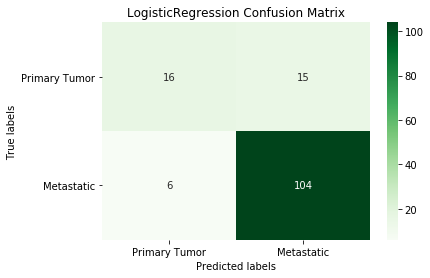

In [23]:
lr_model = grid_search_feature_lr.best_estimator_

lr_pred = grid_search_feature_lr.predict(test_df)

print('LogisticRegression accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), lr_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), lr_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('LogisticRegression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

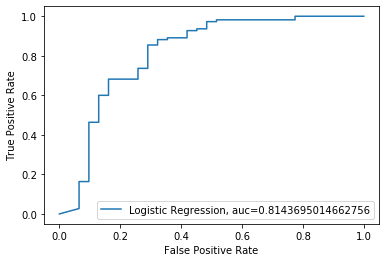

In [24]:
lr_model = grid_search_feature_lr.best_estimator_
lr_pred_proba = lr_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), lr_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [25]:
lr_model = grid_search_feature_lr.best_estimator_
lr_pred_proba = lr_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  lr_pred_proba)
print(log_loss_score)

0.9498588157299732


### Support Vector Machines

In [26]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('SVM', SVC(probability=True))
])

parameters = {
    'SVM__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], 
    "SVM__kernel": ["linear","poly","sigmoid","rbf"], 
    "SVM__decision_function_shape" : ["ovo", "ovr"]
}

grid_search_feature_svm = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_svm.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_svm.best_score_)
print(grid_search_feature_svm.best_params_)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
Best parameter (CV score=0.875):
{'SVM__C': 100, 'SVM__decision_function_shape': 'ovo', 'SVM__gamma': 1, 'SVM__kernel': 'linear'}


Support Vector Machines accuracy: 0.858


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

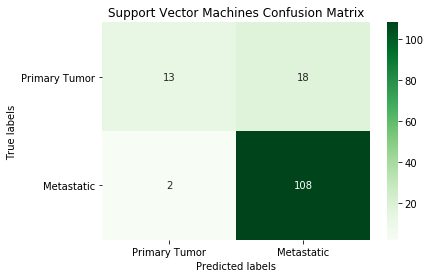

In [27]:
svm_model = grid_search_feature_svm.best_estimator_

svm_pred = grid_search_feature_svm.predict(test_df)

print('Support Vector Machines accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), svm_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), svm_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Support Vector Machines Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

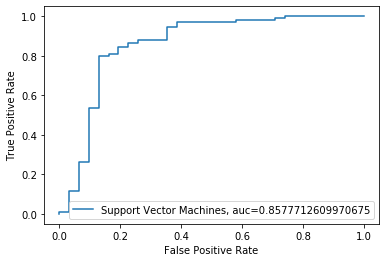

In [28]:
svm_model = grid_search_feature_svm.best_estimator_
svm_pred_proba = svm_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  svm_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), svm_pred_proba)
plt.plot(fpr,tpr,label="Support Vector Machines, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [29]:
svm_model = grid_search_feature_svm.best_estimator_
svm_pred_proba = svm_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  svm_pred_proba)
print(log_loss_score)

0.4355216332637247


### Random Forest 

In [30]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('rf', RandomForestClassifier(random_state=1))
])

parameters = {
    'rf__bootstrap': [True], 
    'rf__n_estimators': [30, 60, 70, 80, 90], 
    'rf__max_features': [0.6, 0.65, 0.7, 0.75, 0.8], 
    "rf__min_samples_leaf":  [6, 8, 10, 12, 14], 
    "rf__min_samples_split" : [2, 3, 5, 7]    
}

grid_search_feature_rf = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_rf.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_rf.best_score_)
print(grid_search_feature_rf.best_params_)

Fitting 2 folds for each of 500 candidates, totalling 1000 fits
Best parameter (CV score=0.902):
{'rf__bootstrap': True, 'rf__max_features': 0.65, 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 2, 'rf__n_estimators': 30}


Random Forest accuracy: 0.901


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

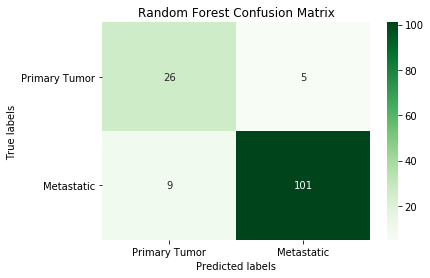

In [31]:
rf_model = grid_search_feature_rf.best_estimator_

rf_pred = grid_search_feature_rf.predict(test_df)

print('Random Forest accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), rf_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), rf_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

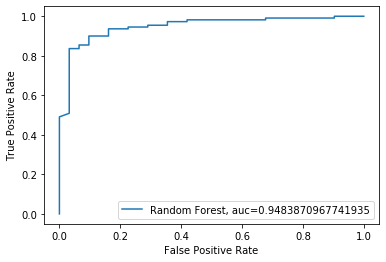

In [32]:
rf_model = grid_search_feature_rf.best_estimator_
rf_pred_proba = rf_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  rf_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), rf_pred_proba)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [33]:
rf_model = grid_search_feature_rf.best_estimator_
rf_pred_proba = rf_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  rf_pred_proba)
print(log_loss_score)

0.2505709436897153


## Classification between Primary Tumor and Metastatic (with PCA)

### Using Logistic Regression

In [34]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', PCA(svd_solver='full')),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],    
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}

grid_search_lr_pca = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_lr_pca.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_lr_pca.best_score_)
print(grid_search_lr_pca.best_params_)

Fitting 2 folds for each of 60 candidates, totalling 120 fits
Best parameter (CV score=0.875):
{'logistic__C': 100, 'logistic__penalty': 'l1', 'pca__n_components': 0.9}


In [35]:
grid_search_lr_pca.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.9, svd_solver='full')),
                ('logistic',
                 LogisticRegression(C=100, max_iter=10000, penalty='l1',
                                    solver='liblinear', tol=0.001))])

LogisticRegression accuracy: 0.865


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

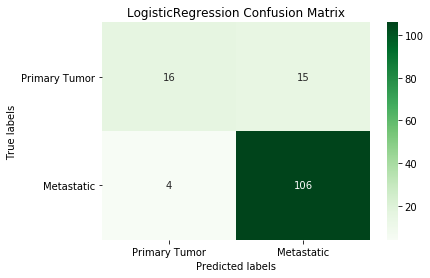

In [36]:
lr_model_pca = grid_search_lr_pca.best_estimator_

lr_pred = grid_search_lr_pca.predict(test_df)

print('LogisticRegression accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), lr_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), lr_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('LogisticRegression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

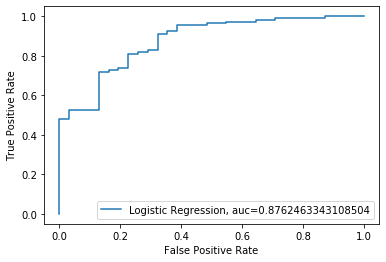

In [37]:
lr_model = grid_search_lr_pca.best_estimator_
lr_pred_proba = lr_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), lr_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [38]:
lr_model = grid_search_lr_pca.best_estimator_
lr_pred_proba = lr_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  lr_pred_proba)
print(log_loss_score)

0.3528621656131404


### Using Support Vector Machines

In [39]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', PCA(svd_solver='full')),    
  ('SVM', SVC(probability=True))
])

parameters = {
    'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],    
    'SVM__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.0001, 10], 
    "SVM__kernel": ["linear","poly","rbf"], 
    "SVM__decision_function_shape" : ["ovo", "ovr"]
}

grid_search_svm_pca = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_svm_pca.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_svm_pca.best_score_)
print(grid_search_svm_pca.best_params_)

Fitting 2 folds for each of 1080 candidates, totalling 2160 fits
Best parameter (CV score=0.862):
{'SVM__C': 100, 'SVM__decision_function_shape': 'ovo', 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf', 'pca__n_components': 0.7}


In [40]:
grid_search_svm_pca.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.7, svd_solver='full')),
                ('SVM',
                 SVC(C=100, decision_function_shape='ovo', gamma=0.1,
                     probability=True))])

Support Vector Machines accuracy: 0.851


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

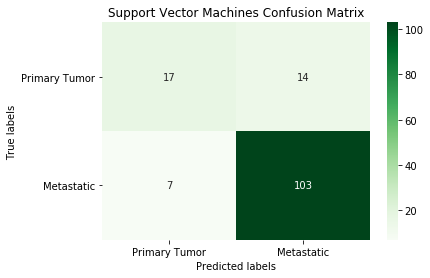

In [41]:
svm_model = grid_search_svm_pca.best_estimator_

svm_pred = grid_search_svm_pca.predict(test_df)

print('Support Vector Machines accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), svm_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), svm_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Support Vector Machines Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

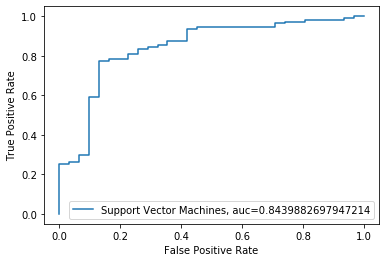

In [42]:
svm_model = grid_search_svm_pca.best_estimator_
svm_pred_proba = svm_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  svm_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), svm_pred_proba)
plt.plot(fpr,tpr,label="Support Vector Machines, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [43]:
svm_model = grid_search_svm_pca.best_estimator_
svm_pred_proba = svm_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  svm_pred_proba)
print(log_loss_score)

0.4351747607672731


### Using Random Forest

In [44]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', PCA(svd_solver='full')),    
  ('rf', RandomForestClassifier(random_state=1))
])

parameters = {
    'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],    
    'rf__bootstrap': [True], 
    'rf__n_estimators': [30, 60, 70, 80, 90], 
    'rf__max_features': [0.6, 0.65, 0.7, 0.75, 0.8], 
    "rf__min_samples_leaf":  [6, 8, 10, 12, 14], 
    "rf__min_samples_split" : [2, 3, 5, 7]    
}

grid_search_rf_pca = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_rf_pca.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_rf_pca.best_score_)
print(grid_search_rf_pca.best_params_)

Fitting 2 folds for each of 2500 candidates, totalling 5000 fits
Best parameter (CV score=0.872):
{'pca__n_components': 0.8, 'rf__bootstrap': True, 'rf__max_features': 0.6, 'rf__min_samples_leaf': 12, 'rf__min_samples_split': 2, 'rf__n_estimators': 90}


In [45]:
grid_search_rf_pca.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.8, svd_solver='full')),
                ('rf',
                 RandomForestClassifier(max_features=0.6, min_samples_leaf=12,
                                        n_estimators=90, random_state=1))])

Random Forest accuracy: 0.872


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

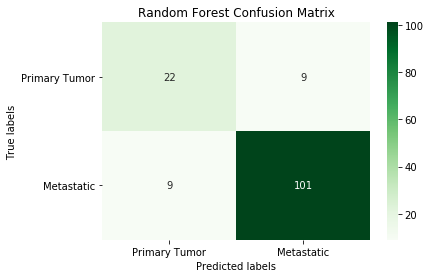

In [46]:
rf_model = grid_search_rf_pca.best_estimator_

rf_pred = grid_search_rf_pca.predict(test_df)

print('Random Forest accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), rf_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), rf_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

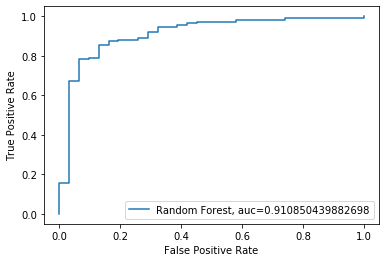

In [47]:
rf_model = grid_search_rf_pca.best_estimator_
rf_pred_proba = rf_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  rf_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), rf_pred_proba)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [48]:
rf_model = grid_search_rf_pca.best_estimator_
rf_pred_proba = rf_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  rf_pred_proba)
print(log_loss_score)

0.3173141963632262


### Weights

In [49]:
lr_model = grid_search_feature_lr.best_estimator_
lr_weights_df = pd.DataFrame(lr_model[1].coef_[0])
lr_weights_df.index = train_df.columns
lr_weights_df.columns = ["weights"]
lr_weights_df.sort_values(by=['weights'], inplace=True, ascending=False)
lr_weights_df.head(20)

,weights
WFDC5,23.684109
KRTDAP,19.921914
treatments_pharmaceutical_treatment_or_therapy_not reported,9.050274
C7,3.686427
treatments_radiation_treatment_or_therapy_yes,1.134097
ethnicity_not hispanic or latino,0.436726
ethnicity_not reported,0.257148
gender_male,0.066492
treatments_radiation_treatment_or_therapy_not reported,0.000000
KRT14,0.000000


In [50]:
svm_model = grid_search_feature_svm.best_estimator_
importances = np.dot(svm_model[1].support_,svm_model[1].support_vectors_)
svm_weights_df = pd.DataFrame(importances)
svm_weights_df.index = train_df.columns
svm_weights_df.columns = ["weights"]
svm_weights_df.sort_values(by=['weights'], inplace=True, ascending=False)
svm_weights_df.head(10)

,weights
age_at_index,6435.108913
CLEC2A,934.161122
ethnicity_not reported,827.238391
bmi,-130.639789
gender_male,-713.420134
treatments_radiation_treatment_or_therapy_not reported,-1209.958107
treatments_pharmaceutical_treatment_or_therapy_not reported,-1484.175092
LCE3D,-1594.915822
treatments_pharmaceutical_treatment_or_therapy_yes,-1871.434521
KRT14,-1983.737562


In [51]:
rf_model = grid_search_feature_rf.best_estimator_
rf_weights_df = pd.DataFrame(rf_model[1].feature_importances_)
rf_weights_df.index = train_df.columns
rf_weights_df.columns = ["weights"]
rf_weights_df.sort_values(by=['weights'], inplace=True, ascending=False)
rf_weights_df.head(10)

,weights
C7,0.264671
S100A7A,0.153357
KRTDAP,0.149210
KRT17,0.085545
S100A7,0.083682
CLEC2A,0.073830
WFDC5,0.064654
age_at_index,0.048461
KLK9,0.040355
KRT14,0.014484


In [52]:
weights = lr_weights_df.merge(svm_weights_df,left_index=True, right_index=True)
weights = weights.merge(rf_weights_df,left_index=True, right_index=True)
weights.columns = ["Logistic Regression", "Support Vector Machines","Random Forest"]
weights.head(20)

,Logistic Regression,Support Vector Machines,Random Forest
WFDC5,23.684109,-2631.991739,0.064654
KRTDAP,19.921914,-2560.231086,0.149210
treatments_pharmaceutical_treatment_or_therapy_not reported,9.050274,-1484.175092,0.000000
C7,3.686427,-5262.470405,0.264671
treatments_radiation_treatment_or_therapy_yes,1.134097,-7562.770734,0.004938
ethnicity_not hispanic or latino,0.436726,-2635.037762,0.000046
ethnicity_not reported,0.257148,827.238391,0.000000
gender_male,0.066492,-713.420134,0.000302
treatments_radiation_treatment_or_therapy_not reported,0.000000,-1209.958107,0.000000
KRT14,0.000000,-1983.737562,0.014484


In [53]:
weights.to_csv('../data/Melanoma_ALL_classifier_[WITHOUT PCA]_weights_all_data.csv')